In [1]:
import pandas as pd

data = pd.read_csv('/content/ecommerce_product_dataset.csv')
df = pd.DataFrame(data)
df.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-08
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-26
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-18
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-03
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-08


In [2]:
df.drop_duplicates()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-08
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-26
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-18
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-03
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-08
...,...,...,...,...,...,...,...,...,...,...
995,996,Throw Blanket,Blankets,207.72,2.3,1973,16,0.46,325,2024-02-11
996,997,Fleece Blanket,Blankets,268.60,3.2,841,201,0.39,1546,2023-06-29
997,998,Throw Blanket,Blankets,92.74,2.8,3454,880,0.02,1295,2023-10-27
998,999,Weighted Blanket,Blankets,152.28,1.3,2850,752,0.34,1962,2023-10-26


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ProductID      1000 non-null   int64  
 1   ProductName    1000 non-null   object 
 2   Category       1000 non-null   object 
 3   Price          1000 non-null   float64
 4   Rating         1000 non-null   float64
 5   NumReviews     1000 non-null   int64  
 6   StockQuantity  1000 non-null   int64  
 7   Discount       1000 non-null   float64
 8   Sales          1000 non-null   int64  
 9   DateAdded      1000 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 78.2+ KB


**Top selling product**

In [6]:
top_selling_product = df[['ProductName','Sales']].sort_values(by='Sales',ascending=False).head(10)
top_selling_product

,ProductName,Sales
943,Screen Protector,1997
430,Sketchbook,1995
624,Silk Sheets,1991
931,Earbuds,1984
614,Linen Sheets,1983
741,Body Scrub,1983
240,Sunscreen,1981
280,Mascara,1979
200,Fish Oil,1978
18,Headphones,1976


**Popular category product berdasarkan penjualan**

In [30]:
# Analyzing popular categories
popular_categories = data.groupby('Category')['Sales'].sum().sort_values(ascending=False).reset_index()
popular_categories.head(10)

,Category,Sales
0,Bedsheets,46631
1,Art and crafting materials,45912
2,Motor vehicle parts,45116
3,Vitamins and supplements,44402
4,Mobile phone accessories,43660
5,Electronics,42844
6,Bicycles,42750
7,Bath and body,42454
8,Makeup,42337
9,Toys & Games,42295


**Price range references**

In [14]:
price_range = df[['Price','Sales']].groupby('Price').sum().reset_index().sort_values(by='Sales',ascending=False)
price_range.head(10)


,Price,Sales
507,256.29,3082
392,205.42,2796
668,336.76,2658
381,202.30,2431
586,290.28,2159
496,252.05,2080
347,186.59,2042
170,94.38,1997
881,447.02,1995
847,433.10,1991


**Customer ratings and reviews**

In [17]:
rating = df[['Rating','NumReviews','Sales']].groupby('Rating').agg({'NumReviews':'sum','Sales':'sum'}).reset_index()
rating

,Rating,NumReviews,Sales
0,1.0,30863,11985
1,1.1,86523,29618
2,1.2,78272,28677
3,1.3,56638,24515
4,1.4,35402,17579
5,1.5,46363,18278
6,1.6,57105,24373
7,1.7,57840,26233
8,1.8,57885,27355
9,1.9,65924,18784


In [35]:
# Grouping sales by rating and finding the maximum and minimum sales for each rating
sales_by_rating = data.groupby('Rating')['Sales'].sum().reset_index()

# Finding the rating with the highest and lowest sales
max_sales_by_rating = sales_by_rating[sales_by_rating['Sales'] == sales_by_rating['Sales'].max()]
min_sales_by_rating = sales_by_rating[sales_by_rating['Sales'] == sales_by_rating['Sales'].min()]


# Grouping sales by rating and finding the maximum and minimum reviews for each rating
reviews_by_rating = data.groupby('Rating')['NumReviews'].sum().reset_index()

# Finding the rating with the highest and lowest number of reviews
max_reviews_rating = reviews_by_rating.loc[reviews_by_rating['NumReviews'].idxmax()]
min_reviews_rating = reviews_by_rating.loc[reviews_by_rating['NumReviews'].idxmin()]

max_sales_by_rating, min_sales_by_rating, max_reviews_rating, min_reviews_rating


(    Rating  Sales
 33     4.3  41178,
     Rating  Sales
 15     2.5  10206,
 Rating            1.1
 NumReviews    86523.0
 Name: 1, dtype: float64,
 Rating            2.5
 NumReviews    18065.0
 Name: 15, dtype: float64)




*   Rating **4.3** memiliki jumlah penjualan tertinggi sebanyak **41,178** unit.
*   Rating **2.5** memiliki jumlah penjualan terendah sebanyak **10,206** unit.


*   Rating **1.1** dengan ulasan terbanyak dengan **86,523** ulasan.
*   Rating **2.5** dengan ulasan tersedikit dengan **18,065** ulasan.







**Discount Impact**

In [36]:
discount_impact = df[['Sales','Discount']].groupby('Discount').sum().reset_index().sort_values(by='Sales',ascending = False)
discount_impact

,Discount,Sales
41,0.41,35486
13,0.13,31033
24,0.24,29527
3,0.03,27134
25,0.25,26817
30,0.30,26485
26,0.26,24763
20,0.20,24332
18,0.18,23941
2,0.02,23761




*   Diskon terbesar dengan **41%** memiliki jumlah penjualan terbanyak dengan **35.486**
*   Penjualan terendah terjadi pada diskon **50%** (**8.123** unit) dan **tanpa diskon (0%)** (**5.518** unit).

Hal ini menunjukkan bahwa diskon (antara 3% hingga 41%) lebih efektif dalam mendorong penjualan yang lebih tinggi dibandingkan dengan diskon yang sangat tinggi atau tidak ada diskon sama sekali.


**Stock management**

In [38]:
stock_management = df[['ProductName','StockQuantity','Sales']].sort_values(by = 'Sales',ascending = False).head(10)
stock_management

,ProductName,StockQuantity,Sales
943,Screen Protector,242,1997
430,Sketchbook,197,1995
624,Silk Sheets,601,1991
931,Earbuds,367,1984
614,Linen Sheets,72,1983
741,Body Scrub,663,1983
240,Sunscreen,68,1981
280,Mascara,78,1979
200,Fish Oil,302,1978
18,Headphones,681,1976


Tingkat stock produk terlaris seperti **Linen Sheet**, **Sunscreen**, dan **Mascara** relatif rendah. Hal ini mengindikasikan perlunya pengisian ulang untuk menghindari kehabisan stock.

**Strategi promosi**

In [24]:
promotion_strategy = df[['Category','Discount','Sales']].groupby(['Category','Discount']).sum().reset_index().sort_values(by='Sales',ascending=False).head(10)
promotion_strategy

,Category,Discount,Sales
549,Skin care,0.41,5891
380,Makeup,0.41,5558
77,Bedsheets,0.38,5482
26,Art and crafting materials,0.47,5434
95,Bicycles,0.20,4974
244,Coats and jackets,0.49,4905
651,Vitamins and supplements,0.34,4458
46,Bath and body,0.26,4405
165,Books,0.46,4365
467,Nail care,0.42,4314


Hal ini menunjukkan bahwa tingkat diskon sekitar **20-49%** efektif untuk mempromosikan penjualan di berbagai kategori.

**Sales over time**

In [26]:
data['DateAdded']=pd.to_datetime(df['DateAdded'])
sales_over_time = df[['DateAdded','Sales']].groupby('DateAdded').sum().reset_index().sort_values(by='DateAdded')
sales_over_time

,DateAdded,Sales
0,2023-06-12,626
1,2023-06-13,550
2,2023-06-14,803
3,2023-06-16,3754
4,2023-06-17,920
...,...,...
341,2024-06-04,1144
342,2024-06-05,2563
343,2024-06-06,1017
344,2024-06-08,7984


from matplotlib import pyplot as plt
sales_over_time['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['DateAdded']
  ys = series['Sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = sales_over_time.sort_values('DateAdded', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DateAdded')
_ = plt.ylabel('Sales')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['DateAdded']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'DateAdded'}, axis=1)
              .sort_values('DateAdded', ascending=True))
  xs = counted['DateAdded']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = sales_over_time.sort_values('DateAdded', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DateAdded')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
sales_over_time['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

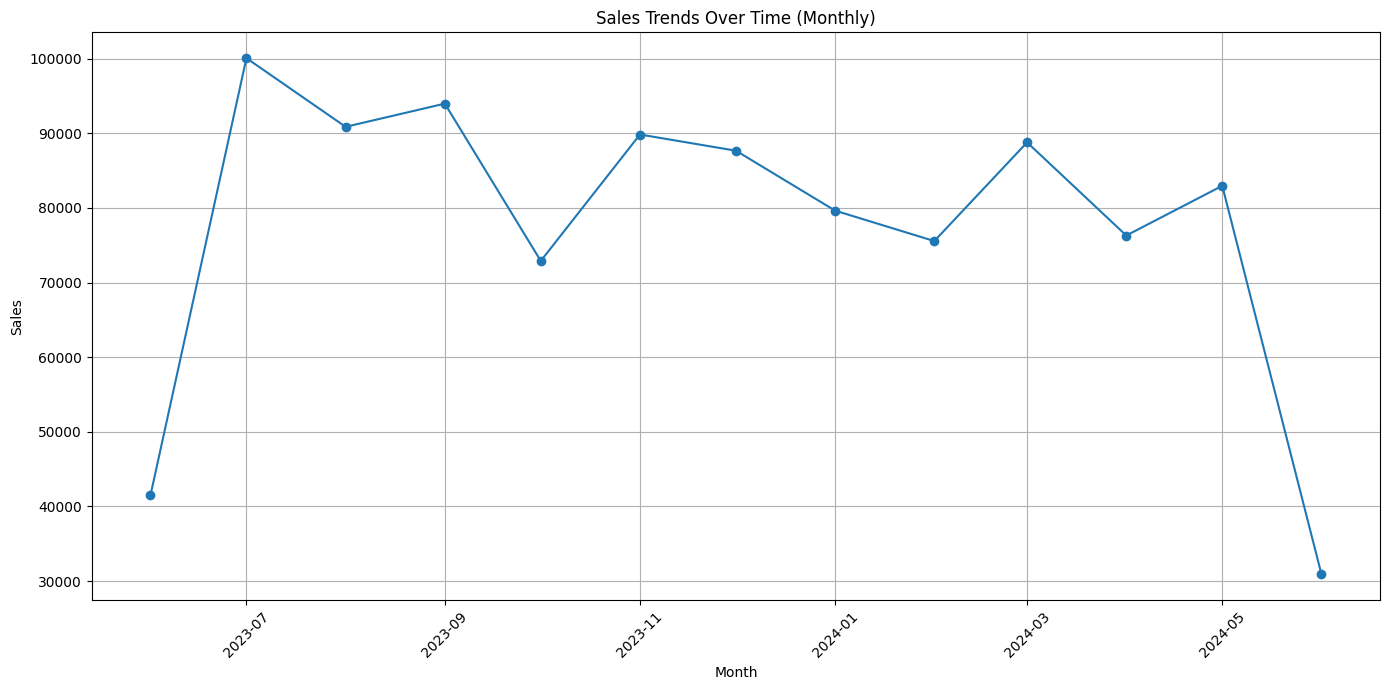

In [47]:
import matplotlib.pyplot as plt

# Ensure the 'DateAdded' column is in datetime format
df['DateAdded'] = pd.to_datetime(df['DateAdded'], errors='coerce')

# Drop any rows with invalid dates
df = df.dropna(subset=['DateAdded'])

# Grouping sales by 'DateAdded'
sales_over_time = df[['DateAdded', 'Sales']].groupby('DateAdded').sum().reset_index().sort_values(by='DateAdded')

# Extracting the month from 'DateAdded' for monthly aggregation
sales_over_time['Month'] = sales_over_time['DateAdded'].dt.to_period('M')

# Grouping sales by month
monthly_sales = sales_over_time.groupby('Month')['Sales'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

# Plotting the sales trends over time with month frequency
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales['Month'], monthly_sales['Sales'], marker='o', linestyle='-')
plt.title('Sales Trends Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Terlihat pada bulan tertentu seperti Juli 2023 dan Maret 2024 memiliki volume penjualan yang sangat tinggi, yang mengindikasikan potensi periode puncak atau acara promosi.